**Lê Phương Nam**

**B22DCCN555**

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder,RobustScaler,OrdinalEncoder
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [150]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Train_samsung.csv")
data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
1,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,Y
2,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban,Y
3,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban,Y
4,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban,N


In [151]:
Var=list()
for i in range(1,12):
    Var.append("X"+str(i))
Var
data.isna().sum()

X1       12
X2        1
X3       11
X4        0
X5       24
X6        0
X7        0
X8       16
X9       12
X10      40
X11       0
Class     0
dtype: int64

In [152]:
for i in Var:
  print(data[i].value_counts())
print(data["Class"].value_counts())

X1
Male      386
Female     93
Name: count, dtype: int64
X2
Yes    311
No     179
Name: count, dtype: int64
X3
0     282
1      79
2      78
3+     41
Name: count, dtype: int64
X4
Graduate        382
Not Graduate    109
Name: count, dtype: int64
X5
No     400
Yes     67
Name: count, dtype: int64
X6
4583     6
2500     6
2600     6
6000     5
4166     4
        ..
2130     1
2764     1
2483     1
5250     1
13650    1
Name: count, Length: 420, dtype: int64
X7
0.0       221
2500.0      5
1800.0      3
1666.0      3
1459.0      3
         ... 
6666.0      1
2405.0      1
2253.0      1
1644.0      1
1126.0      1
Name: count, Length: 236, dtype: int64
X8
120.0    15
100.0    14
110.0    11
187.0    11
160.0    10
         ..
46.0      1
296.0     1
48.0      1
370.0     1
97.0      1
Name: count, Length: 178, dtype: int64
X9
360.0    405
180.0     37
480.0     12
300.0     10
240.0      4
84.0       3
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
X10
1.0    

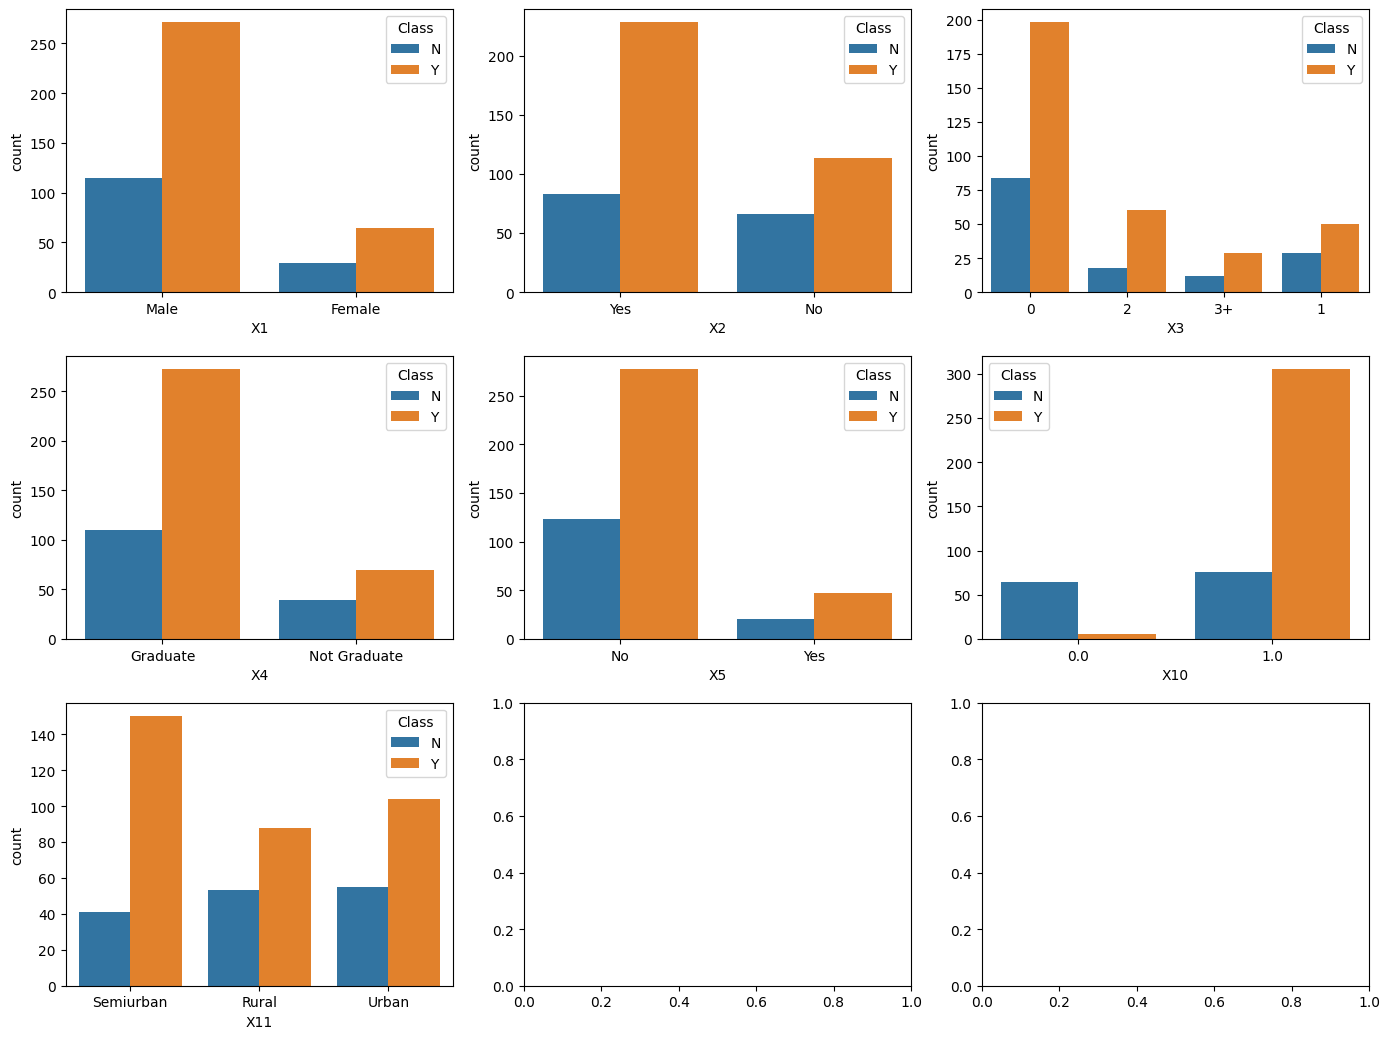

In [153]:
Category_V=['X1', 'X2', 'X3', 'X4', 'X5','X10','X11']
fig, ax = plt.subplots(3,3,figsize=(4*3.5,3*3.5))
for r in range(0,3):
  for c in range(0,3):
    i=r*3+c
    if(i<len(Category_V)):
      ax_i=ax[r,c]
      sns.countplot(data=data,x=Category_V[i],hue="Class",ax=ax_i)
plt.tight_layout()

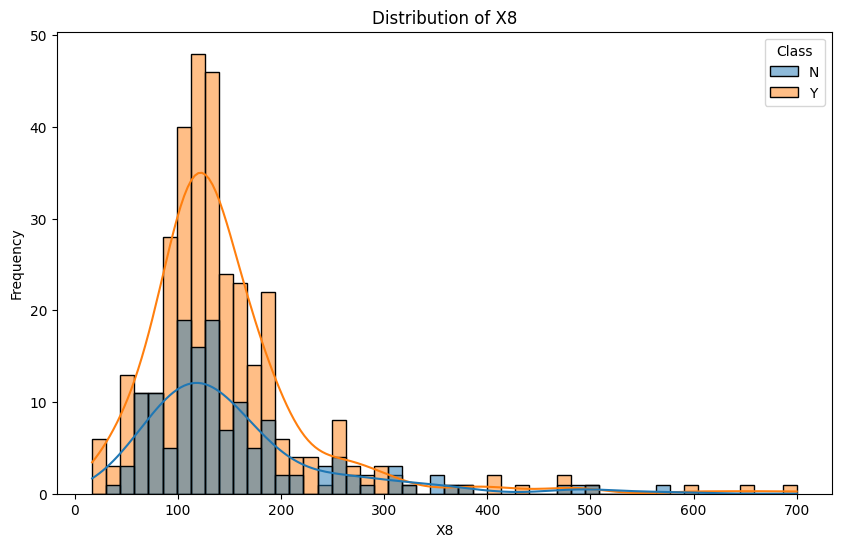

In [154]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data,x=data["X8"],hue="Class",bins=50, kde=True)
plt.title('Distribution of X8')
plt.xlabel('X8')
plt.ylabel('Frequency')
plt.show()

In [155]:
import numpy as np
#Chuẩn hóa log
#data['X8'] = np.log1p(data['X8'])

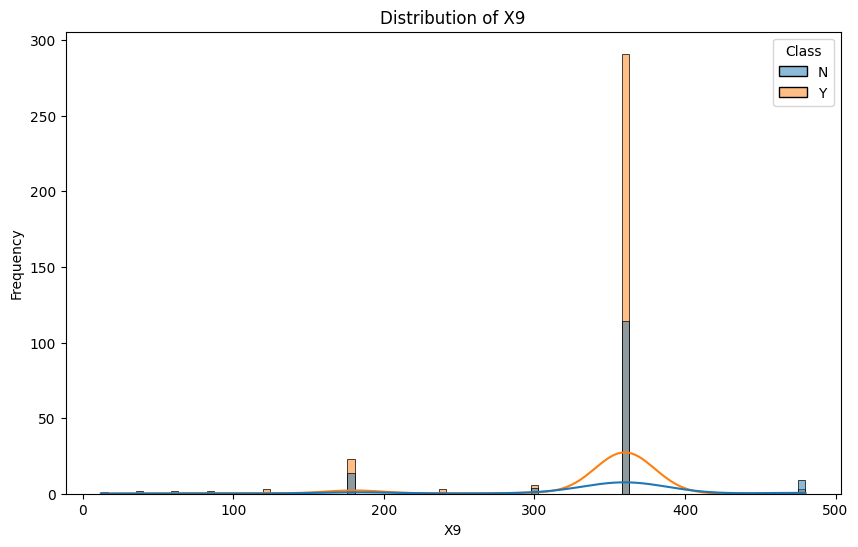

In [156]:
#data['X8'].fillna(data['X8'].median(), inplace=True)
plt.figure(figsize=(10, 6))
sns.histplot(data=data,x=data["X9"],hue="Class",bins=100, kde=True)
plt.title('Distribution of X9')
plt.xlabel('X9')
plt.ylabel('Frequency')
plt.show()

In [157]:
#missvalue
for column in ['X1', 'X3','X2', 'X5','X9','X10']:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)
data['X8'].fillna(data['X8'].median(), inplace=True)

In [158]:
data.isna().sum()

X1       0
X2       0
X3       0
X4       0
X5       0
X6       0
X7       0
X8       0
X9       0
X10      0
X11      0
Class    0
dtype: int64

In [159]:
#datsang category
Category_V=['X1', 'X2', 'X3', 'X4', 'X5','X10','X11','Class']
for i in Category_V:
  data[i]=data[i].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X1      491 non-null    category
 1   X2      491 non-null    category
 2   X3      491 non-null    category
 3   X4      491 non-null    category
 4   X5      491 non-null    category
 5   X6      491 non-null    int64   
 6   X7      491 non-null    float64 
 7   X8      491 non-null    float64 
 8   X9      491 non-null    float64 
 9   X10     491 non-null    category
 10  X11     491 non-null    category
 11  Class   491 non-null    category
dtypes: category(8), float64(3), int64(1)
memory usage: 20.4 KB


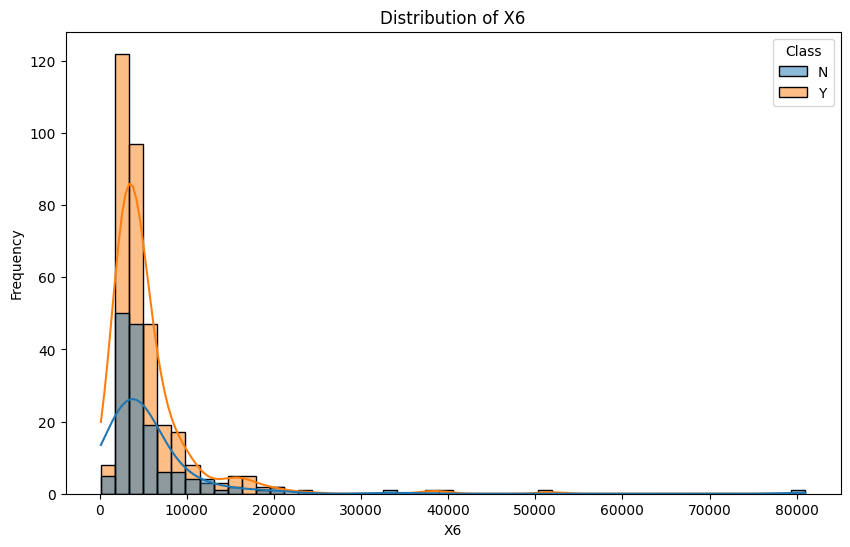

In [160]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data,x=data["X6"],hue="Class",bins=50, kde=True)
plt.title('Distribution of X6')
plt.xlabel('X6')
plt.ylabel('Frequency')
plt.show()

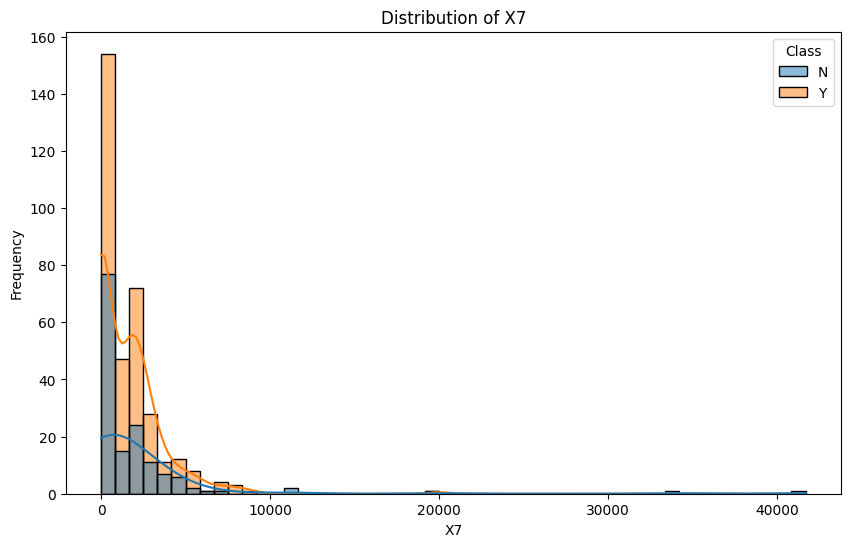

In [161]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data,x=data["X7"],hue="Class",bins=50, kde=True)
plt.title('Distribution of X7')
plt.xlabel('X7')
plt.ylabel('Frequency')
plt.show()

In [162]:
print(Category_V)

['X1', 'X2', 'X3', 'X4', 'X5', 'X10', 'X11', 'Class']


<Axes: >

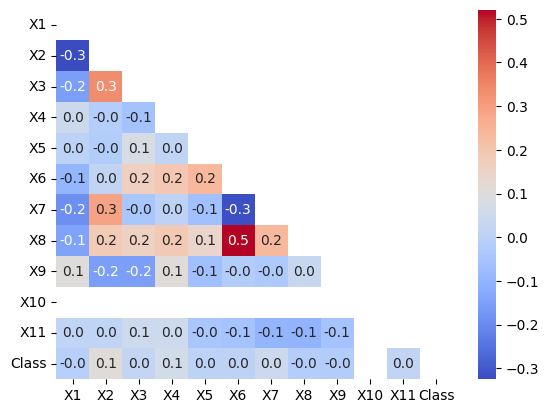

In [163]:
new = data.copy()
new['X1'] = new['X1'].map({'Male':0,'Female':1})
new['X2'] = new['X2'].map({'Yes':1, 'No':0})
new['X11'] = new['X11'].map({'Rural':0,'Semiurban':1,'Urban':2})
new['X4'] = new['X4'].map({'Graduate':1,'Not Graduate':0})
new['X5'] = new['X5'].map({'Yes':1,'No':0})
new['X10'] = new['X10'].map({'1.0':1,'0.0':0})
new['X3'] = new['X3'].map({'0':0,'1':1,'2':2,'3+':3})
new['Class'] = new['Class'].map({'Y':1,'N':0})

sns.heatmap(new.corr(method='spearman'),
           mask = np.triu(np.ones_like(new.corr(method='spearman'),dtype=bool)),
           annot=True,cmap='coolwarm',fmt='.1f')

In [164]:
high_pairs = new.corr(method='spearman').where(np.tril(np.ones(new.corr(method='spearman').shape), k=-1).astype(bool))
high_pairs = high_pairs.stack().reset_index()
high_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_pairs = high_pairs[(high_pairs['Correlation'] >= 0.2) | (high_pairs['Correlation'] <= -0.2)]

high = high_pairs.sort_values('Correlation',ascending=False)
high


,Feature 1,Feature 2,Correlation
26,X8,X6,0.520705
2,X3,X2,0.334296
16,X7,X2,0.288407
14,X6,X5,0.236882
27,X8,X7,0.233352
20,X7,X6,-0.317764
0,X2,X1,-0.325012


In [165]:
df=data.copy()
df['X9_bins']=pd.cut(df['X9'],bins=[0,100,360,500])
df['X9_1'] = df['X9_bins'].cat.codes
df['X9_bins'].value_counts(normalize=True).mul(100).round(2)

X9_bins
(100, 360]    95.93
(360, 500]     2.44
(0, 100]       1.63
Name: proportion, dtype: float64

In [166]:
df=data.copy()

In [167]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,1.0,Semiurban,N
1,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,Y
2,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban,Y
3,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban,Y
4,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
486,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y
487,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
488,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y
489,Female,Yes,0,Graduate,No,10047,0.0,129.0,240.0,1.0,Semiurban,Y


In [168]:
"""
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder,RobustScaler,OrdinalEncoder
# Chia dữ liệu
X = df.drop(['X8_bins','X9_bins','X9','Class'],axis=1)
y = data['Class']
y =y.replace({'N':0,'Y':1})
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, stratify=y,random_state=72)
coltrans = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['X1','X2','X4','X5','X10']),
        ('minmax', MinMaxScaler(), ['X7', 'X8']),
        ('ordinal', OrdinalEncoder(categories=[['0', '1','2','3+'],['Rural','Semiurban','Urban']]), ['X3','X11']),
        ('robust', RobustScaler(), ['X6']),
        ('standard', StandardScaler(), ['X9_1','X8_1', 'X8&X2','X8&X3','X8&X4','X8&X5','X8&X10','X9&X2','X9&X3','X9&X4','X9&X5','X9&X10','X9&X11','X8&X11'])
    ],
    remainder='passthrough'
)
"""

"\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder,RobustScaler,OrdinalEncoder\n# Chia dữ liệu\nX = df.drop(['X8_bins','X9_bins','X9','Class'],axis=1)\ny = data['Class']\ny =y.replace({'N':0,'Y':1})\nX_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, stratify=y,random_state=72)\ncoltrans = ColumnTransformer(\n    transformers=[\n        ('cat', OneHotEncoder(handle_unknown='ignore'), ['X1','X2','X4','X5','X10']),\n        ('minmax', MinMaxScaler(), ['X7', 'X8']),\n        ('ordinal', OrdinalEncoder(categories=[['0', '1','2','3+'],['Rural','Semiurban','Urban']]), ['X3','X11']),\n        ('robust', RobustScaler(), ['X6']),\n        ('standard', StandardScaler(), ['X9_1','X8_1', 'X8&X2','X8&X3','X8&X4','X8&X5','X8&X10','X9&X2','X9&X3','X9&X4','X9&X5','X9&X10','X9&X11','X8&X11'])\n    ],\

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder,RobustScaler,OrdinalEncoder
# Chia dữ liệu
X = df.drop(['Class','X8'],axis=1)
"""
X['X8']=pd.cut(X["X8"],
       bins=[-0.1, 0.2, 0.4, 0.6, 0.8, 1],
       labels=["Very Low", "Low", "Medium", "High", "Very High"])
"""
y = data['Class']
y =y.replace({'N':0,'Y':1})
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, stratify=y,random_state=72)
coltrans = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['X1','X2','X4','X5','X10']),
        ('minmax', MinMaxScaler(), ['X7']),
        ('ordinal', OrdinalEncoder(categories=[['0', '1','2','3+'],['Rural','Semiurban','Urban']]),['X3','X11']),
        ('robust', RobustScaler(), ['X6']),
        ('standard', StandardScaler(), ['X9'])
    ],
    remainder='passthrough'
)

In [170]:
X

,X1,X2,X3,X4,X5,X6,X7,X9,X10,X11
0,Male,Yes,0,Graduate,No,6000,2250.0,360.0,1.0,Semiurban
1,Male,Yes,0,Graduate,No,2958,2900.0,360.0,1.0,Semiurban
2,Male,Yes,2,Graduate,No,6250,1695.0,360.0,1.0,Semiurban
3,Male,Yes,0,Graduate,No,2083,3150.0,360.0,1.0,Semiurban
4,Male,No,0,Graduate,No,4166,0.0,360.0,0.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...
486,Male,Yes,2,Not Graduate,Yes,1875,1875.0,360.0,1.0,Semiurban
487,Male,Yes,2,Graduate,No,11417,1126.0,360.0,1.0,Urban
488,Female,No,0,Graduate,No,3237,0.0,360.0,1.0,Urban
489,Female,Yes,0,Graduate,No,10047,0.0,240.0,1.0,Semiurban


In [233]:
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Test_samsung_noclass.csv")
test.info()
for column in ['X1', 'X3','X2', 'X5','X9','X10']:
    mode_value = test[column].mode()[0]
    test[column].fillna(mode_value, inplace=True)
test['X8'].fillna(test['X8'].median(), inplace=True)
C_V1=['X1', 'X2', 'X3', 'X4', 'X5', 'X10', 'X11']
for i in C_V1:
  test[i]=test[i].astype('category')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      122 non-null    object 
 1   X2      121 non-null    object 
 2   X3      119 non-null    object 
 3   X4      123 non-null    object 
 4   X5      115 non-null    object 
 5   X6      123 non-null    int64  
 6   X7      123 non-null    float64
 7   X8      117 non-null    float64
 8   X9      121 non-null    float64
 9   X10     113 non-null    float64
 10  X11     123 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 10.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X1      123 non-null    category
 1   X2      123 non-null    category
 2   X3      123 non-null    category
 3   X4      123 non-null    category
 4   X5      123 n

In [271]:
df1=df.copy()
df1
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report

In [272]:
df1['8&6']=df1['X8']*df1['X6']
test['8&6']=test['X8']*test['X6']

In [367]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder,RobustScaler,OrdinalEncoder
# Chia dữ liệu thử loại bỏ X6
X = df1.drop(['Class','X6','X11'],axis=1)
"""
X['X8']=pd.cut(X["X8"],
       bins=[-0.1, 0.2, 0.4, 0.6, 0.8, 1],
       labels=["Very Low", "Low", "Medium", "High", "Very High"])
"""
y = data['Class']
y =y.replace({'N':0,'Y':1})
coltrans = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['X1','X2','X4','X5','X10']),
        ('ordinal', OrdinalEncoder(categories=[['0', '1','2','3+']]), ['X3']),
        ('standard', StandardScaler(), ['X9','X8','X7','8&6'])
    ],
    remainder='passthrough'
)

In [368]:
X

,X1,X2,X3,X4,X5,X7,X8,X9,X10,8&6
0,Male,Yes,0,Graduate,No,2250.0,265.0,360.0,1.0,1590000.0
1,Male,Yes,0,Graduate,No,2900.0,131.0,360.0,1.0,387498.0
2,Male,Yes,2,Graduate,No,1695.0,210.0,360.0,1.0,1312500.0
3,Male,Yes,0,Graduate,No,3150.0,128.0,360.0,1.0,266624.0
4,Male,No,0,Graduate,No,0.0,98.0,360.0,0.0,408268.0
...,...,...,...,...,...,...,...,...,...,...
486,Male,Yes,2,Not Graduate,Yes,1875.0,97.0,360.0,1.0,181875.0
487,Male,Yes,2,Graduate,No,1126.0,225.0,360.0,1.0,2568825.0
488,Female,No,0,Graduate,No,0.0,30.0,360.0,1.0,97110.0
489,Female,Yes,0,Graduate,No,0.0,129.0,240.0,1.0,1296063.0


In [369]:
X=coltrans.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.12,random_state=72)
X_test=coltrans.transform(test)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train,y_train = rus.fit_resample(X_train, y_train)


In [380]:
from sklearn.tree import DecisionTreeClassifier
m1_DTC=DecisionTreeClassifier(max_depth=7,random_state=232)
m1_DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=232)

In [356]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5,random_state=2422)
rf.fit(X_train, y_train)
# Dự đoán và đánh giá mô hình
y_pred_rf = rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
classification_rep_rf = classification_report(y_val, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_val, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Classification Report:\n{classification_rep_rf}")
print(f"Confusion Matrix:\n{confusion_mat_rf}")

Accuracy: 0.7272727272727273
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.57      0.60        35
           1       0.78      0.81      0.79        64

    accuracy                           0.73        99
   macro avg       0.70      0.69      0.70        99
weighted avg       0.72      0.73      0.72        99

Confusion Matrix:
[[20 15]
 [12 52]]


In [359]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# Xây dựng mô hình XGBoost
xgb = XGBClassifier(random_state=2220)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
classification_rep_xgb = classification_report(y_val, y_pred_xgb)
confusion_mat_xgb = confusion_matrix(y_val, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb}")
print(f"Classification Report:\n{classification_rep_xgb}")
print(f"Confusion Matrix:\n{confusion_mat_xgb}")

Accuracy: 0.6161616161616161
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.71      0.57        35
           1       0.78      0.56      0.65        64

    accuracy                           0.62        99
   macro avg       0.63      0.64      0.61        99
weighted avg       0.67      0.62      0.62        99

Confusion Matrix:
[[25 10]
 [28 36]]


In [358]:
from sklearn.ensemble import GradientBoostingClassifier
GrB=GradientBoostingClassifier(random_state=12)
GrB.fit(X_train,y_train)
y_pred_rgb = GrB.predict(X_val)
accuracy_rgb = accuracy_score(y_val, y_pred_xgb)
classification_rep_rgb = classification_report(y_val, y_pred_xgb)
confusion_mat_rgb = confusion_matrix(y_val, y_pred_xgb)
print(f"Accuracy: {accuracy_rgb}")
print(f"Classification Report:\n{classification_rep_rgb}")
print(f"Confusion Matrix:\n{confusion_mat_rgb}")

Accuracy: 0.6161616161616161
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.71      0.57        35
           1       0.78      0.56      0.65        64

    accuracy                           0.62        99
   macro avg       0.63      0.64      0.61        99
weighted avg       0.67      0.62      0.62        99

Confusion Matrix:
[[25 10]
 [28 36]]


In [ ]:
df1.info()

In [ ]:
test.isna().sum()

In [ ]:
for column in ['X1', 'X3','X2', 'X5','X9','X10']:
    mode_value = test[column].mode()[0]
    test[column].fillna(mode_value, inplace=True)
test['X8'].fillna(test['X8'].median(), inplace=True)

In [381]:
y_pred=m1_DTC.predict(X_val)
#precision_score(y_val,y_pred),recall_score(y_val,y_pred)
classification_mDtr= classification_report(y_val, y_pred)
print(classification_mDtr)

              precision    recall  f1-score   support

           0       0.70      0.79      0.75        24
           1       0.84      0.77      0.81        35

    accuracy                           0.78        59
   macro avg       0.77      0.78      0.78        59
weighted avg       0.79      0.78      0.78        59



In [383]:
ans=m1_DTC.predict(X_test)

In [386]:
ans

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [391]:
test["Class"] = ans
test['Class'].replace({1: "Y", 0: "N"}, inplace=True)

output=test
output.to_csv('Ktr2.csv', index=False,columns='Class')

KeyError: "None of [Index(['C', 'l', 'a', 's', 's'], dtype='object')] are in the [columns]"

In [ ]:
output = pd.DataFrame({'Class': ans})
output.to_csv('Ktr1.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( max_depth=100,random_state=42)
rf.fit(X_train, y_train)
# Dự đoán và đánh giá mô hình
y_pred_rf = rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
classification_rep_rf = classification_report(y_val, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_val, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Classification Report:\n{classification_rep_rf}")
print(f"Confusion Matrix:\n{confusion_mat_rf}")

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# Xây dựng mô hình XGBoost
xgb = XGBClassifier(random_state=100)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
classification_rep_xgb = classification_report(y_val, y_pred_xgb)
confusion_mat_xgb = confusion_matrix(y_val, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb}")
print(f"Classification Report:\n{classification_rep_xgb}")
print(f"Confusion Matrix:\n{confusion_mat_xgb}")

In [ ]:
df